In [1]:
import xarray as xr
import intake
from collections import defaultdict
import matplotlib.pyplot as plt
import xesmf
import numpy as np
import cartopy.crs as ccrs

In [2]:
path_1dgr = "lehre/msc-intro-computational-meteorology-exercises-w2025/ERA5/ERA5_monthly.1940-2025.precip_radflx.1deg.nc"
#path_2dgr = "lehre/msc-intro-computational-meteorology-exercises-w2025/ERA5/ERA5_monthly.1940-2025.precip_radflx.2deg.nc"
data_1dgr = xr.open_dataset(path_1dgr, chunks = "auto")
#data_2dgr = xr.open_dataset(path_2dgr, chunks = "auto")

#data_1dgr.variables

precipitation_data =  data_1dgr['tp']

precipitation_data



<xarray.DataArray 'tp' (valid_time: 1029, lat: 180, lon: 360)> Size: 267MB
dask.array<open_dataset-tp, shape=(1029, 180, 360), dtype=float32, chunksize=(818, 143, 286), chunktype=numpy.ndarray>
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01T06:00:00 ... 2025-...
  * lon         (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                Total precipitation
    units:                                    m
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Total precipitation
    GRIB_shortName:                           tp
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    GRIB_surface:                             0.0

(180, 360)


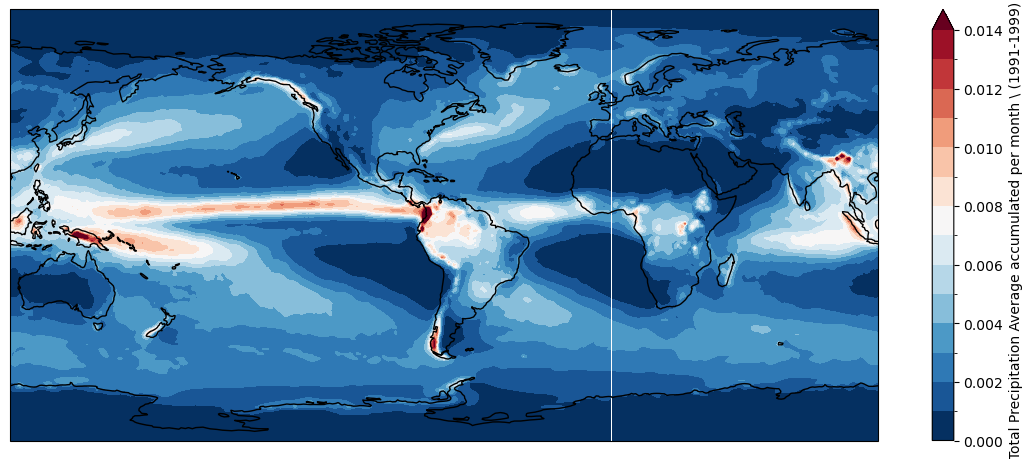

In [3]:

area_prec = precipitation_data.sel(valid_time=slice("1990","1999"))

area_prec = area_prec.mean(dim="valid_time")


print(area_prec.values.shape)
plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=290))
area_prec.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r', 
    levels=np.arange(0, 0.015, 0.001), # Anomalie-Skala
    cbar_kwargs={'label': f'Daily Total Precipitation Average accumulated per month \\ (1991-1999) [m]', "shrink":0.7}
                 #'orientation': 'vertical',"shrink" : 0.7,
                 #'pad': 0.05}
)
ax.coastlines()
#ax.set_global()
#ax.set_title(f'Relative Temperature anomaly of 2024 to (1991-2020) |  mean anomaly: {global_anomaly_value_2024:.3f} °C')
plt.show()

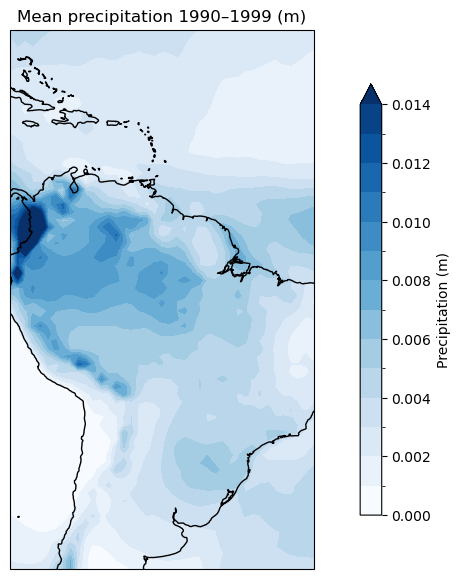

In [4]:
area_prec2= area_prec.sel(lat=slice(-40.5, 30.5), lon = slice(280,320))
area_prec2
plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())   # Daten sind in PlateCarree
im = area_prec2.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(),
    cmap="Blues",                               # sequentiell statt divergend
    levels=np.arange(0, 0.015, 0.001),
    cbar_kwargs={"label": "Precipitation (m)", "shrink": 0.8},
)
ax.coastlines()
#ax.set_extent([280, 340, -30, 0], crs=ccrs.PlateCarree())  # zoom auf Box
ax.set_title("Mean precipitation 1990–1999 (m)")
plt.show()

In [5]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
query = dict(
    variable_id=['pr'],
    table_id='Amon',
    experiment_id=['historical'],
    grid_label='gn',
    member_id='r1i1p1f1'
)

cat_subset = cat.search(require_all_on=["source_id"], **query)

dsets = cat_subset.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    storage_options={'token': 'anon'}
)

for model_name, ds in dsets.items():
    print(f"Model: {model_name}, Dataset dimensions: {ds.dims}")
    
    


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Model: CMIP.NASA-GISS.GISS-E2-2-H.historical.Amon.gn, Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lat': 90, 'bnds': 2, 'lon': 144, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
Model: CMIP.MIROC.MIROC6.historical.Amon.gn, Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lat': 128, 'bnds': 2, 'lon': 256, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
Model: CMIP.BCC.BCC-ESM1.historical.Amon.gn, Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lat': 64, 'bnds': 2, 'lon': 128, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
Model: CMIP.CAS.CAS-ESM2-0.historical.Amon.gn, Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lat': 128, 'bnds': 2, 'lon': 256, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
Model: CMIP.FIO-QLNM.FIO-ESM-2-0.historical.Amon.gn, Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lat': 192, 'bnds': 2, 'lon': 288, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
Model: CMIP.NCAR.CESM2-FV2.historical.Amon.

test <xarray.DataArray 'pr' (member_id: 1, dcpp_init_year: 1, lat: 90, lon: 144)> Size: 52kB
dask.array<mean_agg-aggregate, shape=(1, 1, 90, 144), dtype=float32, chunksize=(1, 1, 90, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 720B -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
  * lon             (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan


KeyError: "not all values found in index 'member_id'. Try setting the `method` keyword argument (example: method='nearest')."

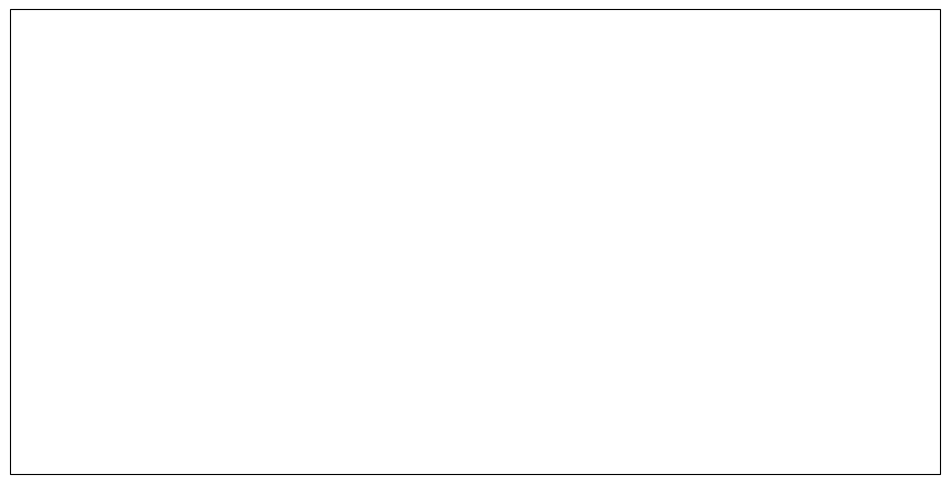

In [19]:
pr_means = {}

for model_name, ds in dsets.items():
    #ds = model
    pr = ds['pr']
    pr_mean = pr.sel(time=slice("1990","1999")).mean(dim="time")
    pr_means[model_name] = pr_mean
key1 = list(pr_means.keys())[0]
print('test',pr_means[key1])
plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())   # Daten sind in PlateCarree
im = pr_means[key1].sel(member_id='1', drop=True) .plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(),
    cmap="Blues",                               # sequentiell statt divergend
    levels=np.arange(0, 0.015, 0.001),
    cbar_kwargs={"label": "Precipitation (m)", "shrink": 0.8},
)
ax.coastlines()
ax.set_title(f"Mean precipitation 1990–1999 (m) for model {model}")
plt.show()

In [7]:
dsets

{'CMIP.NASA-GISS.GISS-E2-2-H.historical.Amon.gn': <xarray.Dataset> Size: 103MB
 Dimensions:         (lat: 90, bnds: 2, lon: 144, member_id: 1,
                      dcpp_init_year: 1, time: 1980)
 Coordinates:
   * lat             (lat) float64 720B -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
     lat_bnds        (lat, bnds) float64 1kB dask.array<chunksize=(90, 2), meta=np.ndarray>
   * lon             (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
     lon_bnds        (lon, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
   * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
     time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
   * member_id       (member_id) object 8B 'r1i1p1f1'
   * dcpp_init_year  (dcpp_init_year) float64 8B nan
 Dimensions without coordinates: bnds
 Data variables:
     pr              (member_id, dcpp_init_year, time, lat, lon) float32 103MB dask.array<chunksize=(1, 1, 9